# Exploratory data analysis (EDA)

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../Data/Raw/owid-covid-data.csv')


In [67]:
# Drop all rows where date is not equal to 01.10.2020
data.drop(data[data['date'] != "2020-10-01"].index, inplace = True)

### Rows to consider dropping: 
- World
- International

In [68]:
# Drop rows
data.drop(data[data['location'] == "World"].index, inplace = True) 
data.drop(data[data['location'] == "International"].index, inplace = True)

# Save locations for getting location names later
data['location'].to_csv("../Data/Raw/locations.csv", index=False) 

### Columns to consider dropping: 
- iso_code 
- date 
- new_cases 
- new_cases_smoothed 
- new_deaths 
- new_deaths_smoothednew_cases_per_million
- new_cases_smoothed_per_millionnew_deaths_per_million
- new_deaths_smoothed_per_million
- new_tests
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- location
- continent
- total_cases
- total_deaths
- total_tests
- tests_units 

In [69]:
# Drop columns
data.drop(['iso_code', 'date', 'new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed','new_cases_per_million', 'new_cases_smoothed_per_million','new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'location', 'continent', 'total_cases', 'total_deaths', 'total_tests', 'tests_units'], axis=1, inplace=True)

Left with one categorical feature

tests_units --> This feature has some strange values that is not that intuitive. E.g what is the difference between "people tested" and "tests performed"? Will however keep this feature for now, despite a high number of NaN's.

In [72]:
# One hot encoding to convert from categorical to numerical data.
data = pd.get_dummies(data)

In [73]:
data.shape

(210, 21)

### Impute our data to remove any NaN

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)

IterativeImputer(random_state=0)

In [75]:
imputed_df = imp_mean.transform(data)
data = pd.DataFrame(imputed_df, columns=data.columns)

### Scale data

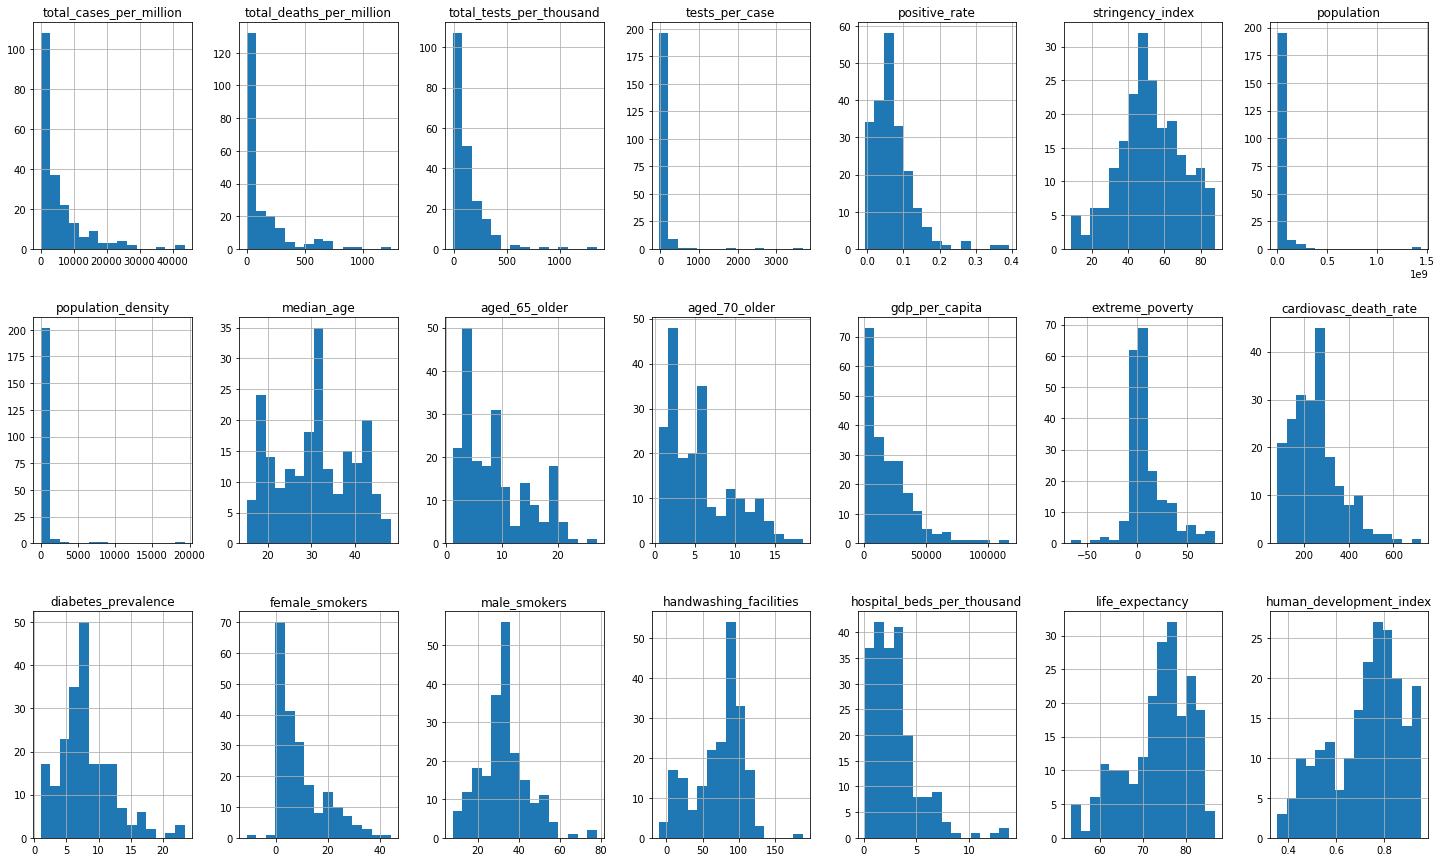

In [76]:
categorical = np.array(data.columns)
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7));

In [77]:
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [78]:
data.describe()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.128109,0.107657,0.099224,0.047490,0.190422,0.554406,0.025666,0.018689,0.476149,0.298178,...,0.169264,0.528959,0.270704,0.316172,0.374076,0.355173,0.419406,0.208349,0.605192,0.614387
std,0.172198,0.159252,0.122125,0.090684,0.139963,0.221804,0.099011,0.079362,0.261285,0.225180,...,0.167097,0.134650,0.170861,0.182016,0.166930,0.161932,0.171393,0.165086,0.224255,0.250178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013442,0.012253,0.020328,0.020225,0.100306,0.424731,0.000716,0.002145,0.249245,0.095541,...,0.040770,0.462069,0.149716,0.201833,0.241441,0.262429,0.308349,0.093796,0.485285,0.425710
50%,0.063615,0.042105,0.062524,0.036584,0.165619,0.535527,0.004800,0.005013,0.487915,0.252500,...,0.128431,0.484119,0.260055,0.283415,0.318383,0.349414,0.473660,0.182482,0.650433,0.668614
75%,0.176337,0.145594,0.132945,0.046851,0.248780,0.709280,0.018174,0.012963,0.696375,0.467014,...,0.240891,0.570104,0.352786,0.406348,0.454616,0.427557,0.536686,0.268248,0.766283,0.803668
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

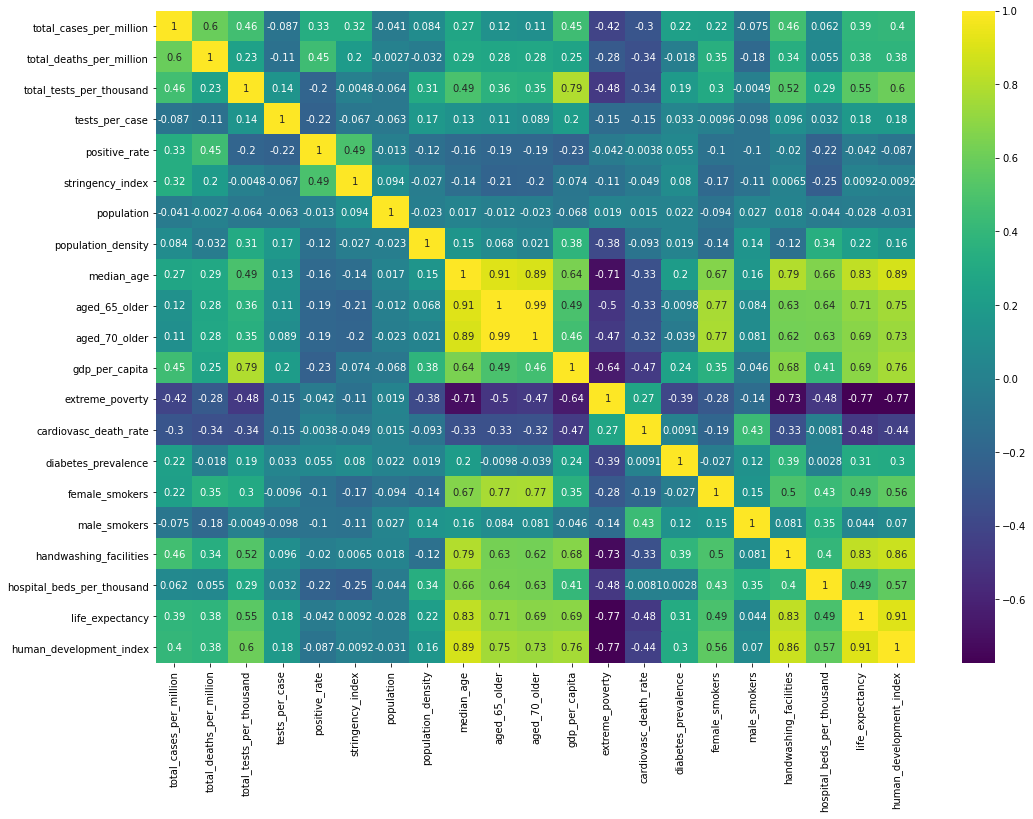

In [83]:
plt.figure(figsize=(17, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [80]:
data.to_csv("../Data/Processed/processed.csv", index=False)